# Exercício - Comparação da redução do custo entre o Perceptron com treinamento online e com treinamento em batch

In [1]:
import numpy as np

In [2]:
def criaDataset(n=20):
    X = np.random.uniform(size=(n,2))
    y = np.array(X[:,0] > X[:,1], dtype=int)*2-1 #fazer 1 e -1
    return X, y

In [3]:
Xtr, ytr = criaDataset(200)
#Xtr, ytr

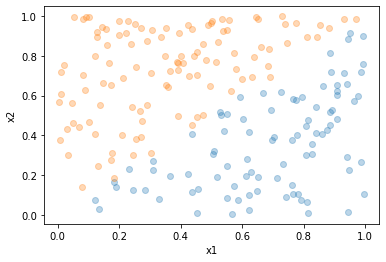

In [4]:
import matplotlib.pyplot as plt

def plotDataset(X, y):
    plt.xlabel('x1')
    plt.ylabel('x2')

    for k in set(y):
        plt.plot(X[:,0][y==k],
                 X[:,1][y==k],
                 "o", alpha=0.3)

plotDataset(Xtr, ytr)

In [5]:
def plotCusto(x):
    plt.xlabel('Iteração')
    plt.ylabel('Custo')
    plt.plot(x)

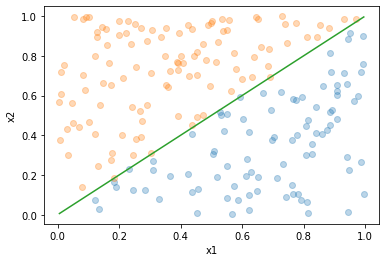

In [6]:
def plotHiperplano(X, y, vetor, intercept=0):
    x0min = min(X[:,0])
    x0max = max(X[:,0])

    xs = np.linspace(x0min, x0max, num=2)
    ys = -(vetor[0]/vetor[1])*xs-intercept/vetor[1]

    plt.plot(xs, ys)

plotDataset(Xtr, ytr)
plotHiperplano(Xtr, ytr, [1,-1])
plt.show()

### Treinamento em batch

1.0
[ 12.775475   -12.78750897]


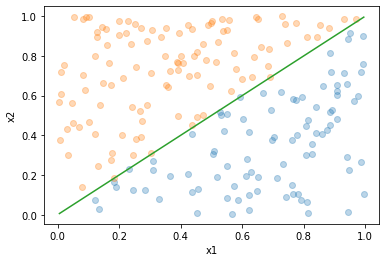

In [7]:
from sklearn.base import BaseEstimator, ClassifierMixin
import random

class Perceptron(BaseEstimator, ClassifierMixin):

    def __init__(self, max_iter=100):
        self.w = None
        self.activation = lambda a: (a>0)*2-1 
        self.max_iter = max_iter
        self.custo = []

    def predict(self,X,y=None):
        a = X @ self.w
        #a = np.matmul(X,self.w)
        ypred = self.activation(a)
        return ypred
        
    def fit(self, X, y):
        self.w =np.random.uniform(-1,1,size=X.shape[1]) 
        indices = list(range(X.shape[0]))
        for _ in range(self.max_iter):
            any_error = False
            erros = []
            for i in sorted(indices, key=lambda k:random.random()):
                x = X[i,:] 
                ypred = self.predict(x) 
                erro = y[i]-ypred 
                erros.append(erro**2)
                if erro: 
                    any_error = True
                self.w += erro*x 
            
            arr = np.array(erros)
            custo = sum(arr**2)
            self.custo.append(custo)
            if not any_error:
                break

perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
ypred = perceptron.predict(Xtr)
print(sum(ypred==ytr)/len(ytr)) #acurácia
print(perceptron.w)
plotDataset(Xtr,ytr)
plotHiperplano(Xtr,ytr,perceptron.w)

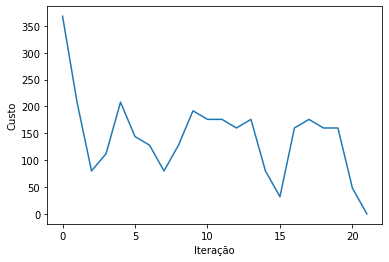

In [8]:
plotCusto(perceptron.custo)
plt.show()

### Treinamento em batch

1.0
[ 127.70312956 -127.21585885]


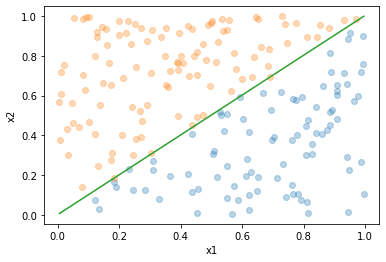

In [10]:
from sklearn.base import BaseEstimator, ClassifierMixin
import random

class Perceptron(BaseEstimator, ClassifierMixin):

    def __init__(self, max_iter=100):
        self.w = None
        self.activation = lambda a: (a>0)*2-1 
        self.max_iter = max_iter
        self.custo = []

    def predict(self,X,y=None):
        a = X @ self.w
        #a = np.matmul(X,self.w)
        ypred = self.activation(a)
        return ypred
        
    def fit(self, X, y):
        self.w =np.random.uniform(-1,1,size=X.shape[1]) 
        indices = list(range(X.shape[0]))
        for i in range(self.max_iter):
            ypred = self.predict(X)
            erros = y - ypred
            custo = sum(erros**2)
            self.custo.append(custo)
            if custo == 0:
                break
            self.w += X.T @ erros

perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
ypred = perceptron.predict(Xtr)
print(sum(ypred==ytr)/len(ytr)) 
print(perceptron.w)
plotDataset(Xtr,ytr)
plotHiperplano(Xtr,ytr,perceptron.w)


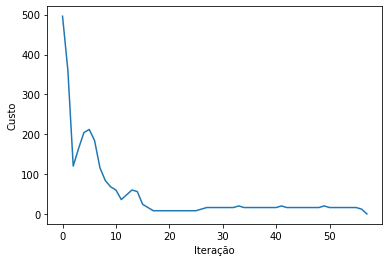

In [11]:
plotCusto(perceptron.custo)
plt.show()

Pode-se perceber que na evolução do custo quando é utilizado o treinamento em batch o gráfico fica mais suave até chegar ao custo zero, ao passo que no treinamento online acontecem alguns picos e vales antes de o custo chegar a zero. O que acontece é que a atualização dos pesos no treinamento em batch é feita pela média das amostras classificadas erradas, enquanto que a atualização dos pesos no treinamento online é feita via uma única amostra classificada errada, por isso que vê-se nos gráficos a diferença de suavidade para chegar ao custo zero.